<a href="https://colab.research.google.com/github/shinhyunji36/codestates-ai-project/blob/main/AI_03_%EC%8B%A0%ED%98%84%EC%A7%80_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Section1 Project**
- AI_03 신현지

- 프로젝트 목표 : **다음 분기에 어떤 게임을 설계해야하는가**
- 조사 방법 : **데이터 기반 의사결정** 과정과 그 결과 제시
- 발표 대상 : **(데이터 분석에 관한 배경지식이 없는) 비데이터 직군**


# **Data Description**
- data type : game sales
- Features :

  1) Name : 게임의 이름

  2) Platform : 게임이 지원되는 플랫폼의 이름

  3) Year : 게임이 출시된 연도

  4) Genre : 게임의 장르

  5) Publisher : 게임을 제작한 회사

  6) NA_Sales : 북미지역에서의 출고량

  7) EU_Sales : 유럽지역에서의 출고량

  8) JP_Sales : 일본지역에서의 출고량

  9) Other_Sales : 기타지역에서의 출고량

  * *Sales feature 내 단위 : k = 1000(천), m = 1000000(백만)*

# **1. 데이터 전처리**
###**1-1. 데이터 준비 및 확인**

In [2]:
# 로컬 데이터 불러오기
from google.colab import files
uploaded = files.upload()


Saving vgames2.csv to vgames2.csv


In [146]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# csv파일 불러오기
df = pd.read_csv("vgames2.csv",index_col=1).iloc[:,1:]
df.head(20)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0


In [158]:
# 데이터 타입 확인
df.dtypes

Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

### **1-2. 데이터 확인 후 전처리 계획 및 실행**

1. 데이터 타입 관련

  1) NA_Sales,	EU_Sales,	JP_Sales,	Other_Sales (각 나라별 출고량)

  ```
  (1) 현재 object 타입으로 =>  int 타입 변환 필요
  (2) 소수와 k,m 등 단위 통일 필요 (k = 천 , m = 백만)
  ```

  2) Year (출시 연도)
  ```
  (1) N/A , 2015(4자리 연도), 15(2자리 연도), 0(2000년?)(한자리 연도) 섞여있음 
      => 결측치 처리, 4자리로 통일 필요
  ```
 



2. 결측치 관련 (isnull().sum() != 0)

  1) Year, Genre, Publisher

  ```
  (1) Year 
  : 선택적 dropna (World_Sales 만든 후(Feature Engineering), 
  Year 컬럼에서 Nan인 값 중 World_Sales top10을 가려내 수기로 Year값을 채워준다.
  >> 나머지 Year에서 Nan 값들은 dropna 처리)
  (2) Genre : ?
  (3) Publisher : ?
  ```

1) NA_Sales, EU_Sales, JP_Sales, Other_Sales (각 나라별 출고량) K, M 단위 통일

- M 없애기
- K를 기준으로 그 앞 문자(숫자의 모습을 한 문자)를 float 타입으로 만들기 (int!= float)
- float 타입으로 만들어진 것에 1000(k)를 곱하고, 거기에 1000000(m)을 나눠줘서 M 단위 소수로 만들어주기 (k = 1000, m = 1000000)
- 그 후 * 1000000 해주기

In [159]:
#참고 : https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe

# NA_Sales
df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**-3, 1]).astype(float))  #10**-3 = k/m = 10**4 / 10**6

# EU_Sales
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**-3, 1]).astype(float))  #10**-3 = k/m = 10**4 / 10**6

# JP_Sales
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**-3, 1]).astype(float))  #10**-3 = k/m = 10**4 / 10**6

# Other_Sales
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**-3, 1]).astype(float))  #10**-3 = k/m = 10**4 / 10**6


In [160]:
#전체 판매량
df['World_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [161]:
df.NA_Sales = df.NA_Sales * 1000000
df.EU_Sales = df.EU_Sales * 1000000
df.JP_Sales = df.JP_Sales * 1000000
df.Other_Sales = df.Other_Sales * 1000000
df.World_Sales = df.World_Sales * 1000000

In [162]:
#check
df.EU_Sales['Kill.Switch']

Name
Kill.Switch    270000.0
Kill.Switch     10000.0
Kill.Switch     50000.0
Name: EU_Sales, dtype: float64

2) Year (출시 연도)

* N/A(결측치) 처리
* 2015(4자리 연도), 15(2자리 연도), 0(2000년?)(한자리 연도) 섞여있음  >> 4자리로 통일 필요, 결측치 처리

In [163]:
# 1자리 년도, 2자리 년도 => 4자리 년도(아직 float) 만들어서 list에 담기
df_year_list = []

for i in df.Year:
  if i >= 0 and i < 10:
    i = str(i)
    i = '200'+i
    i = float(i)
        
  elif i >= 10 and i < 20:
    i = str(i)
    i = '20'+i
    i = float(i)
    
  elif i > 85 and i < 99:
    i = str(i)
    i = '19'+i
    i = float(i)
    
  df_year_list.append(i)
print(df_year_list)

[2008.0, 2009.0, 2010.0, 2010.0, 2010.0, 2005.0, 2011.0, 2005.0, 2007.0, 2011.0, 2001.0, 2003.0, 2008.0, 2005.0, 2006.0, 2009.0, 2003.0, 2014.0, 2015.0, 2009.0, 2002.0, 1997.0, 2005.0, 2014.0, 2013.0, 2002.0, 1996.0, 2011.0, 2004.0, 2000.0, 2011.0, nan, 2006.0, 2015.0, 2004.0, 2009.0, 2005.0, 1984.0, 2008.0, 2006.0, 2000.0, 2004.0, 2007.0, 2008.0, 2013.0, 2015.0, 1998.0, 2002.0, 2008.0, 2009.0, 2005.0, 2009.0, 2001.0, 2009.0, 2009.0, 2010.0, 2016.0, 2010.0, 2010.0, 1985.0, 2006.0, 2008.0, 2010.0, 2011.0, 2004.0, 1998.0, 2011.0, 2004.0, 2014.0, 2010.0, 1999.0, 2007.0, 2015.0, 2003.0, 2009.0, 2010.0, 1985.0, 2000.0, 2007.0, 2008.0, 2005.0, 1997.0, 1997.0, 2003.0, 2000.0, 2003.0, 1995.0, 2005.0, 2010.0, 1999.0, 2010.0, 2005.0, 2011.0, 2014.0, 2003.0, 1998.0, 2011.0, 2001.0, 2010.0, 1993.0, 2014.0, 2009.0, 2002.0, 2004.0, 2005.0, 2007.0, 2005.0, 2000.0, 2016.0, nan, 2012.0, 2007.0, 1996.0, 2005.0, 2006.0, 2014.0, 2008.0, 2016.0, 2004.0, 2006.0, 2007.0, 1999.0, 2007.0, 2003.0, 2012.0, 2009.

In [164]:
# 4자리 년도(float타입) 담긴 list를 df.Year column의 값으로 설정
df.Year = df_year_list
df.Year

Name
Candace Kane's Candy Factory                      2008.0
The Munchables                                    2009.0
Otome wa Oanesama Boku ni Koi Shiteru Portable    2010.0
Deal or No Deal: Special Edition                  2010.0
Ben 10 Ultimate Alien: Cosmic Destruction         2010.0
                                                   ...  
Ice Age 2: The Meltdown                           2006.0
Rainbow Islands: Revolution                       2005.0
NBA 2K16                                          2015.0
Toukiden: The Age of Demons                       2013.0
The King of Fighters '95                          1996.0
Name: Year, Length: 16598, dtype: float64

In [165]:
# float 타입인 4자리 년도(가 담긴 column의 값들)를 int 타입으로 만들기
df.Year = df.Year.apply(int)
df.Year

ValueError: ignored

> **문제 발생 : 결측치는 NAN 처리 할 수 없음.**

In [166]:
# 문제 해결 : Year 컬럼의 결측치 가진 값들 중 판매량 순으로 탑 10만 짤라서? 수동으로 채워주기?
# 1) 전체 판매량 구하기
# df['World_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

# 1) year 결측치 가진 값들 불러와서 World_Sales 기준 top10 뽑기
cond = df.Year.isnull()
df_sort_group_top10_inull = df[cond].sort_values(by="World_Sales",ascending=False).head(10)
df_sort_group_top10_inull

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
Name,,,,,,,,,
Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4260000.0,260000.0,10000.0,710000.0,5240000.0
FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,590000.0,2360000.0,40000.0,510000.0,3500000.0
LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1860000.0,1020000.0,0.0,290000.0,3170000.0
wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1570000.0,1020000.0,0.0,410000.0,3000000.0
Space Invaders,2600,NaN,Shooter,Atari,2360000.0,140000.0,0.0,30000.0,2530000.0
Rock Band,X360,NaN,Misc,Electronic Arts,1930000.0,340000.0,0.0,210000.0,2480000.0
Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2150000.0,180000.0,0.0,70000.0,2400000.0
LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1540000.0,630000.0,0.0,220000.0,2390000.0
Call of Duty 3,Wii,NaN,Shooter,Activision,1190000.0,840000.0,0.0,230000.0,2260000.0


In [167]:
# year 결측치 값 World_Sales 기준 top10 >> df에 수기로 채워주기
df.loc['Madden NFL 2004','Year'] = df.loc['Madden NFL 2004','Year'].fillna(2003)
df.loc['FIFA Soccer 2004','Year']= df.loc['FIFA Soccer 2004','Year'].fillna(2003)
df.loc['LEGO Batman: The Videogame','Year'] = df.loc['LEGO Batman: The Videogame','Year'].fillna(2008)
df.loc['wwe Smackdown vs. Raw 2006'] = df.loc['wwe Smackdown vs. Raw 2006'].fillna(2005)
df.loc['Space Invaders','Year'] = df.loc['Space Invaders','Year'].fillna(1978)
df.loc['Rock Band','Year'] = df.loc['Rock Band','Year'].fillna(2007)
df.loc["Frogger's Adventures: Temple of the Frog",'Year'] = 2001           # dataframe이 아니라, 값 하나라서 fillna가 되지 않음 > 값을 직접 대입
df.loc['LEGO Indiana Jones: The Original Adventures','Year'] = df.loc['LEGO Indiana Jones: The Original Adventures','Year'].fillna(2008)  
df.loc['Call of Duty 3','Year'] = df.loc['Call of Duty 3','Year'].fillna(2006)
df.loc['Rock Band','Year'] = df.loc['Rock Band','Year'].fillna(2007)


In [168]:
# 채워주고 남은 결측값 dropna 
df.dropna(axis = 0, inplace = True)

In [169]:
# check
cond = df.Year.isnull()
df_sort_group_top10_inull = df[cond].sort_values(by="World_Sales",ascending=False).head(10)
df_sort_group_top10_inull
df.loc['Madden NFL 2004','Year']

Name
Madden NFL 2004    2003.0
Madden NFL 2004    2003.0
Madden NFL 2004    2003.0
Madden NFL 2004    2003.0
Name: Year, dtype: float64

>**문제 해결**
- 문제 : 결측치(Nan값)는 int 처리 할 수 없음. 
- 해결 방법 : World_Sales 기준 Year 컬럼의 값이 Nan인 value를 수기로 기입 >> 그 외에 Nan 값들은 dropna로 없애줌
- 다음 스탭 : float 타입인 4자리 년도(가 담긴 column의 값들)를 int 타입으로 만들기

In [170]:
# float 타입인 4자리 년도(가 담긴 column의 값들)를 int 타입으로 만들기
df.Year = df.Year.apply(int)
df.Year

Name
Candace Kane's Candy Factory                      2008
The Munchables                                    2009
Otome wa Oanesama Boku ni Koi Shiteru Portable    2010
Deal or No Deal: Special Edition                  2010
Ben 10 Ultimate Alien: Cosmic Destruction         2010
                                                  ... 
Ice Age 2: The Meltdown                           2006
Rainbow Islands: Revolution                       2005
NBA 2K16                                          2015
Toukiden: The Age of Demons                       2013
The King of Fighters '95                          1996
Name: Year, Length: 16254, dtype: int64

# **2. EDA**
- 지역에 따라서 선호하는 게임 장르가 다를까
- 연도별 게임의 트렌드가 있을까
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


###**2-1. 지역에 따라서 선호하는 게임 장르가 다를까 (공통사항)**

In [171]:
# H0 : 지역에 따라 선호하는 게임 장르에는 차이가 없다. (두 변수 간 연관이 없다 / 깨부시기 위한 가설)
# HA : 지역에 따라 선호하는 게임 장르에는 차이가 있다.(두 변수간 연관이 있다 / 주장하고자 하는 바)

# two sample 카이제곱 검정 : 데이터 끼리의 두개의 샘플에서 있는 데이터의 빈도 혹은 분포의 값이 비슷하다/비슷하지 않다를 밝힐 때 사용 (장르 / 국가별 판매량)

In [172]:
# genre를 기준으로 sales 데이터 (na, eu, jp, other)의 합 구하기
# 국가별로 어떤 장르가 "가장 많이 팔렸는가(> 그래서 '평균'이 아니라 '합' 구해야 한다)" 확인 후 비교

genre_sum = df.groupby(['Genre'])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,862720000.0,515750000.0,156600000.0,184780000.0
Adventure,103940000.0,63840000.0,51870000.0,16770000.0
Fighting,221920000.0,100920000.0,87140000.0,36560000.0
Misc,399710000.0,209520000.0,104180000.0,73620000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,578030000.0,311210000.0,38180000.0,102120000.0


In [173]:
# 2sample 카이제곱 검정 시행
import numpy as np
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(genre_sum)
msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))

Test Statistic: 687785964.381235
p-value: 0.0
Degree of Freedom: 33


> 카이제곱 검정 시행 결과, p-value의 값이 0.0으로, 0.05(신뢰구간 95%)보다 작다.
```
따라서 H0(귀무 가설)은 옳을 확률이 매우 낮기 때문에, H1(대립가설)을 채택한다.
즉, 지역에 따라 선호하는 게임 장르에 차이가 있을 확률이 높다.
``` 

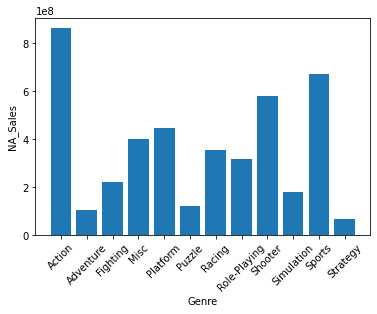

<Figure size 1440x288 with 0 Axes>

In [174]:
#1 NA
plt.bar(genre_sum.index,genre_sum.NA_Sales)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('NA_Sales')
plt.figure(figsize=(20,4))

plt.show()

```
북미는 Action > Sports > Shooter 순으로 게임 판매량이 높다.
```

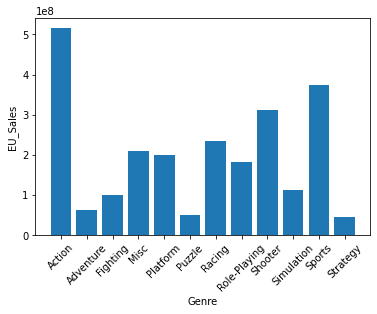

<Figure size 1440x288 with 0 Axes>

In [175]:
#2 EU
plt.bar(genre_sum.index,genre_sum.EU_Sales)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('EU_Sales')
plt.figure(figsize=(20,4))

plt.show()

```
유럽은 Action > Sports > Shooter 순으로 게임 판매량이 높다.
```

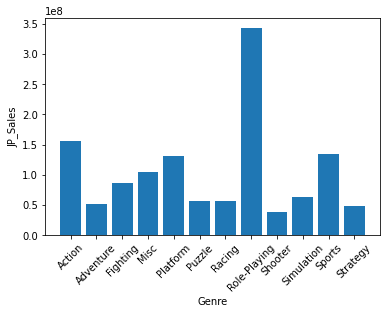

<Figure size 1440x288 with 0 Axes>

In [176]:
#3 JP
plt.bar(genre_sum.index,genre_sum.JP_Sales)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('JP_Sales')
plt.figure(figsize=(20,4))

plt.show()

```
일본은 Role-Playing > Action > Sports(Platform과 근소한 차이)순으로 게임 판매량이 높다.
```

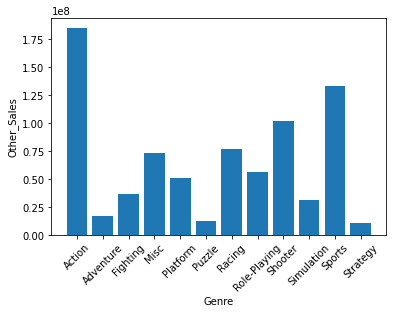

<Figure size 1440x288 with 0 Axes>

In [177]:
#4 Other
plt.bar(genre_sum.index,genre_sum.Other_Sales)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Other_Sales')
plt.figure(figsize=(20,4))

plt.show()

```
그 외 국가들은 Action > Sports > Shooter 순으로 게임 판매량이 높다.
```

In [178]:
# World Sales와 NA, EU, JP, Other 의 sales 합 함께 시각화
genre_sum['World_Sales'] = genre_sum.NA_Sales + genre_sum.EU_Sales + genre_sum.JP_Sales + genre_sum.Other_Sales
genre_sum.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
Genre,,,,,
Action,862720000.0,515750000.0,156600000.0,184780000.0,1.719850e+09
Adventure,103940000.0,63840000.0,51870000.0,16770000.0,2.364200e+08
Fighting,221920000.0,100920000.0,87140000.0,36560000.0,4.465400e+08
Misc,399710000.0,209520000.0,104180000.0,73620000.0,7.870300e+08
Platform,445380000.0,200630000.0,130530000.0,51450000.0,8.279900e+08


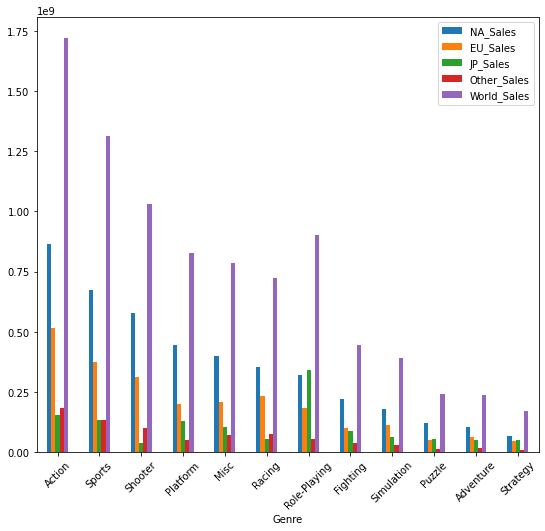

In [179]:
# World Sales와 NA, EU, JP, Other 의 sales 합 함께 시각화 (ver1. 모두 bar 그래프)
x = genre_sum[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","World_Sales"]].sort_values("NA_Sales",ascending=False)

x.plot(kind="bar",figsize=(9,8))
plt.xticks(rotation=45)
plt.show()

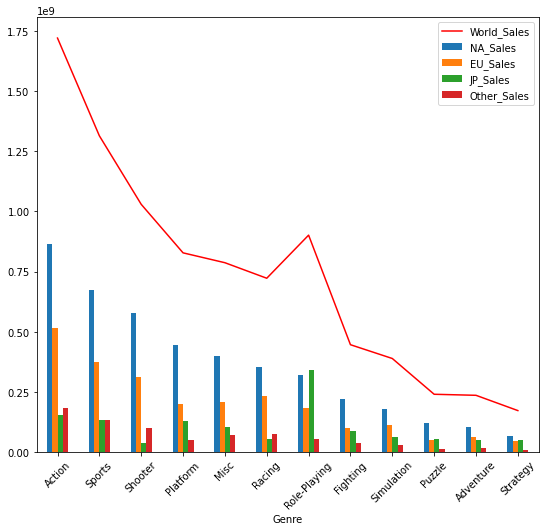

In [180]:
# World Sales와 NA, EU, JP, Other 의 sales 합 함께 시각화 (ver2. World_Sales(총 합)는 라인 그래프로 표시)

x = genre_sum[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","World_Sales"]].sort_values("NA_Sales",ascending=False)

x[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sort_values("NA_Sales",ascending=False).plot(kind="bar",figsize=(9,8),label='Lable1')
x['World_Sales'].plot(color="red",label='World_Sales')

plt.legend()
plt.xticks(rotation=45)
plt.show()

```
세계 판매량(총합)은 Action > Sport > Shooter 순으로 높다.
```

###**2-2. 연도별 게임의 트렌드가 있을까 (공통사항)**

In [181]:
# H0 : 연도에 따라 게임 장르의 차이가 없다. (두 변수 간 연관이 없다 / 깨부시기 위한 가설)
# HA : 연도에 따라 게임 장르에는 차이가 있다.(두 변수간 연관이 있다 / 주장하고자 하는 바)

# two sample 카이제곱 검정 : 데이터 끼리의 두개의 샘플에서 있는 데이터의 빈도 혹은 분포의 값이 비슷하다/비슷하지 않다를 밝힐 때 사용 (연도 / 장르)

In [182]:
# 연도별 게임 트랜드 분석
year_trend = df[["Year","Genre","World_Sales"]].groupby(["Year","Genre"]).sum()
year_trend.sort_values('Year',ascending=True).head(10)

World_Sales
Year Genre                  
1978 Shooter       2530000.0
1980 Action         340000.0
     Fighting       770000.0
     Misc          2700000.0
     Shooter       7070000.0
1981 Sports         780000.0
     Shooter      10020000.0
     Racing         480000.0
     Simulation     440000.0
     Platform      6920000.0

Text(0.5, 0, 'Year')

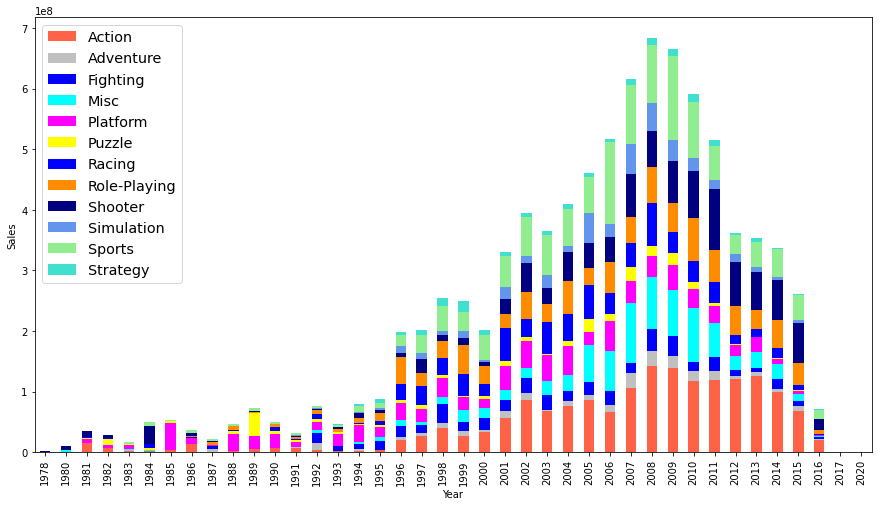

In [183]:
# 참고 : https://www.youtube.com/watch?v=Xt_L_iMXElU (Tiny Data로 만들고 시각화 할 때 unstack과 transpose, reset_index를 언제 사용해야 하나요?)
# multi index 사용 시 stack/ unstack 사용
colors = ['tomato','silver','blue',
          'cyan','magenta','yellow',
          'b','darkorange','navy',
          'cornflowerblue','lightgreen','turquoise']

ax = year_trend['World_Sales'].unstack().plot.bar(stacked=True, figsize=(15,8), color=colors)
plt.legend(loc='upper left',fontsize='x-large')
ax.set_ylabel('Sales')
ax.set_xlabel('Year')

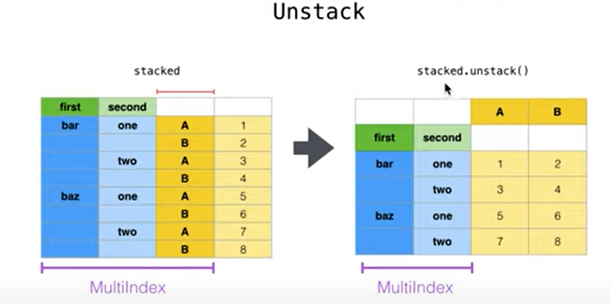

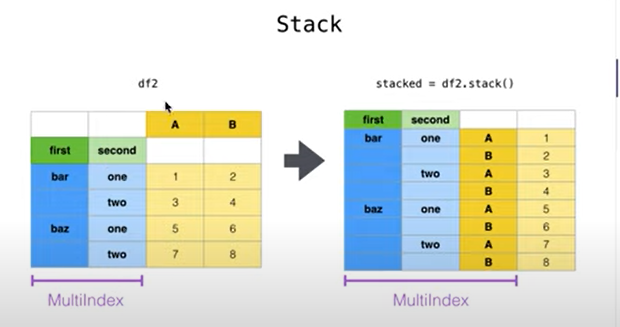

###**2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 (공통사항)**

In [184]:
grouped_top10_sales = df.sort_values(by="World_Sales",ascending=False).head(10)
grouped_top10_sales

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0


## **전체 출고량 기준 top10**

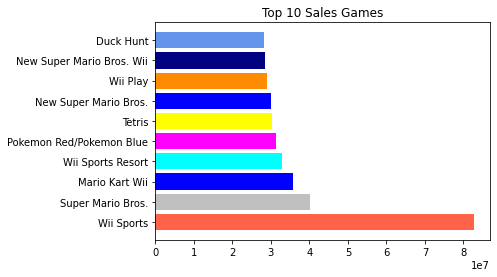

In [185]:
# 출고량이 가장 많은 상위 10위 게임들

plt.barh(grouped_top10_sales.index ,grouped_top10_sales['World_Sales'],color=colors)
plt.title(label='Top 10 Sales Games')
plt.show()


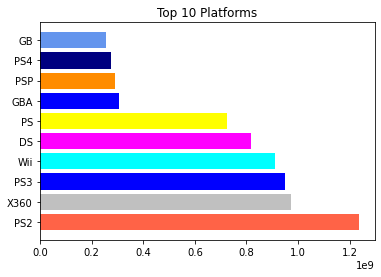

In [187]:
# 출고량이 가장 많은 상위 10위 게임 플랫폼
grouped_top10_platform = df.groupby(["Platform"])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","World_Sales"]].sum()
top10_platform = grouped_top10_platform.sort_values(by='World_Sales',ascending=False).head(10)

plt.barh(top10_platform.index ,top10_platform['World_Sales'],color=colors)
plt.title(label='Top 10 Platforms')
plt.show()

## **전체 출고량 기준 top10 in 2000s**

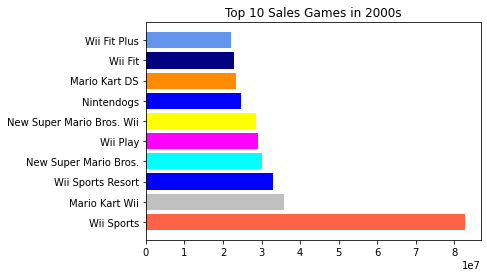

In [186]:
# 2000년대(최근 20년간) 출고량이 가장 많은 상위 10위 게임들
cond1 = (df['Year'] >= 2000)
latest_trend_game = df[cond1].sort_values(by="World_Sales",ascending=False).head(10)
latest_trend_game

plt.barh(latest_trend_game.index ,latest_trend_game['World_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s')
plt.show()

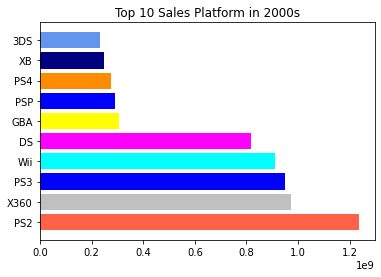

In [188]:
# 2000년대(최근 20년간) 출고량이 가장 많은 상위 10위 플랫폼
cond1 = (df['Year'] >= 2000)
latest_trend = df[cond1].sort_values(by="World_Sales",ascending=False)

latest_trend_platform = latest_trend.groupby(["Platform"])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","World_Sales"]].sum()
latest_top10_platform =  latest_trend_platform.sort_values(by='World_Sales',ascending=False).head(10)
latest_top10_platform

plt.barh(latest_top10_platform.index ,latest_top10_platform['World_Sales'],color=colors)
plt.title(label='Top 10 Sales Platform in 2000s')
plt.show()

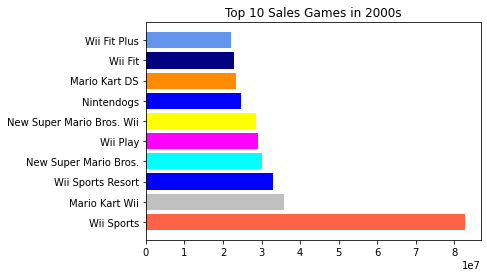

In [189]:
cond1 = (df['Year'] >= 2000)
latest_trend_game = df[cond1].sort_values(by="World_Sales",ascending=False).head(10)
latest_trend_game

plt.barh(latest_trend_game.index ,latest_trend_game['World_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s')
plt.show()

## **지역 기준 게임 top10 in 2000s**

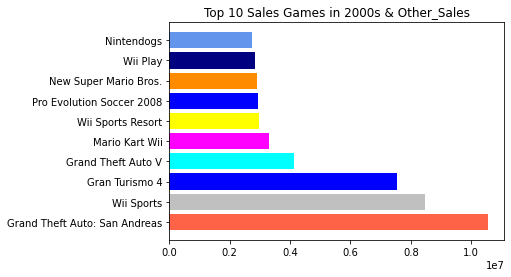

In [193]:
# other_sales기준 게임 top 10 in 2000s
cond1 = (df['Year'] >= 2000)
other_trend_game = df[cond1].sort_values(by="Other_Sales",ascending=False).head(10)
other_trend_game

plt.barh(other_trend_game.index ,other_trend_game['Other_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s & Other_Sales')
plt.show()

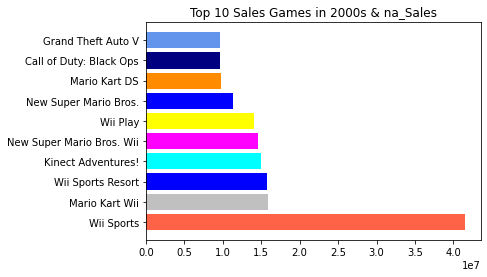

In [194]:
# NA_sales기준 게임 top 10 in 2000s
cond1 = (df['Year'] >= 2000)
na_trend_game = df[cond1].sort_values(by="NA_Sales",ascending=False).head(10)

plt.barh(na_trend_game.index ,na_trend_game['NA_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s & na_Sales')
plt.show()

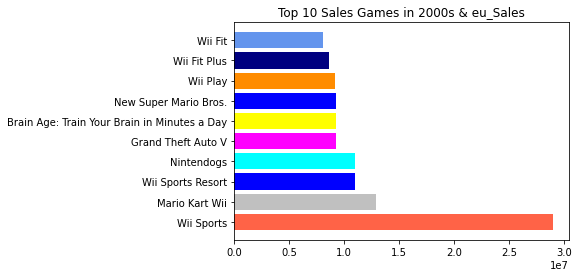

In [195]:
# EU_sales기준 게임 트랜드
cond1 = (df['Year'] >= 2000)
EU_trend_game = df[cond1].sort_values(by="EU_Sales",ascending=False).head(10)
other_trend_game

plt.barh(EU_trend_game.index ,EU_trend_game['EU_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s & eu_Sales')
plt.show()

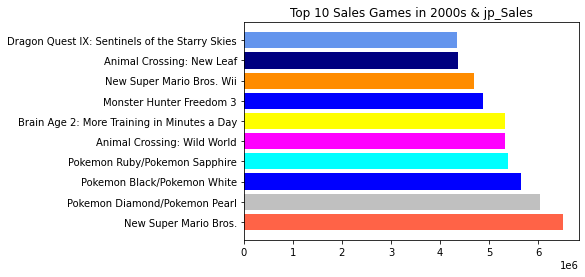

In [196]:
# JP_sales기준 게임 트랜드
cond1 = (df['Year'] >= 2000)
jp_trend_game = df[cond1].sort_values(by="JP_Sales",ascending=False).head(10)
other_trend_game

plt.barh(jp_trend_game.index ,jp_trend_game['JP_Sales'],color=colors)
plt.title(label='Top 10 Sales Games in 2000s & jp_Sales')
plt.show()